In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.datasets import fetch_california_housing

print("All imports successful")

All imports successful


In [2]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [4]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [6]:
df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [7]:
df.head(4).T

,0,1,2,3
MedInc,8.325200,8.301400,7.257400,5.643100
HouseAge,41.000000,21.000000,52.000000,52.000000
AveRooms,6.984127,6.238137,8.288136,5.817352
AveBedrms,1.023810,0.971880,1.073446,1.073059
Population,322.000000,2401.000000,496.000000,558.000000
AveOccup,2.555556,2.109842,2.802260,2.547945
Latitude,37.880000,37.860000,37.850000,37.850000
Longitude,-122.230000,-122.220000,-122.240000,-122.250000
MedHouseVal,4.526000,3.585000,3.521000,3.413000


In [9]:
model = LinearRegression()

features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']
target = 'MedHouseVal'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model.fit(X_train, y_train)

print("Model trained!")
print(f"X Train shape: {X_train.shape}")
print(f"Y Train shape: {y_train.shape}")
print(f"X Test shape: {X_test.shape}")
print(f"Y Test shape: {y_test.shape}")

Model trained!
X Train shape: (16512, 6)
Y Train shape: (16512,)
X Test shape: (4128, 6)
Y Test shape: (4128,)


In [14]:
predictions = model.predict(X_test)

print(f"Predictions Shape: {predictions.shape}")
print(f"\nFirst 5 Predictions:\n{predictions[:5]}")
print(f"\nFirst 5 Actual Values:\n{y_test[:5]}")

Predictions Shape: (4128,)

First 5 Predictions:
[0.72181273 1.76418942 2.70185565 2.84075617 2.60480099]

First 5 Actual Values:
20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
Name: MedHouseVal, dtype: float64


In [15]:
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"R2 Score: {r2:.3f}")
print(f"MAE: ${mae:.3f}")
print(f"RMSE: ${rmse:.3f}")

R2 Score: 0.575
MAE: $0.534
RMSE: $0.746


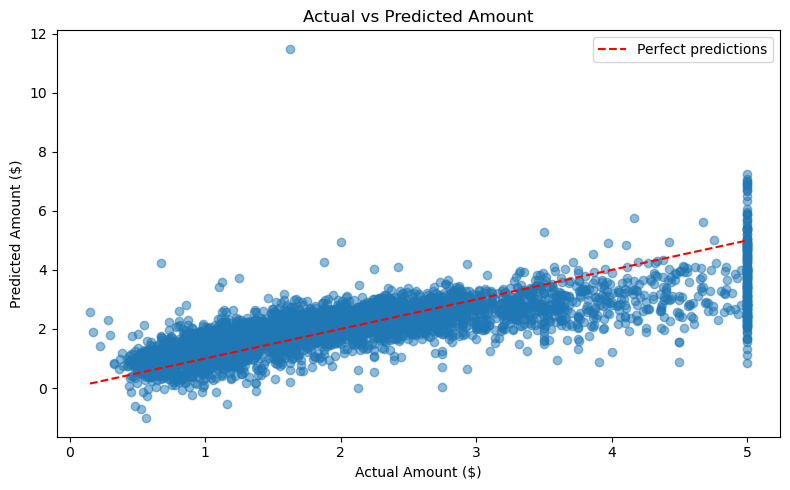

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect predictions')
plt.xlabel('Actual Amount ($)')
plt.ylabel('Predicted Amount ($)')
plt.title('Actual vs Predicted Amount')
plt.legend()
plt.tight_layout()
plt.show()

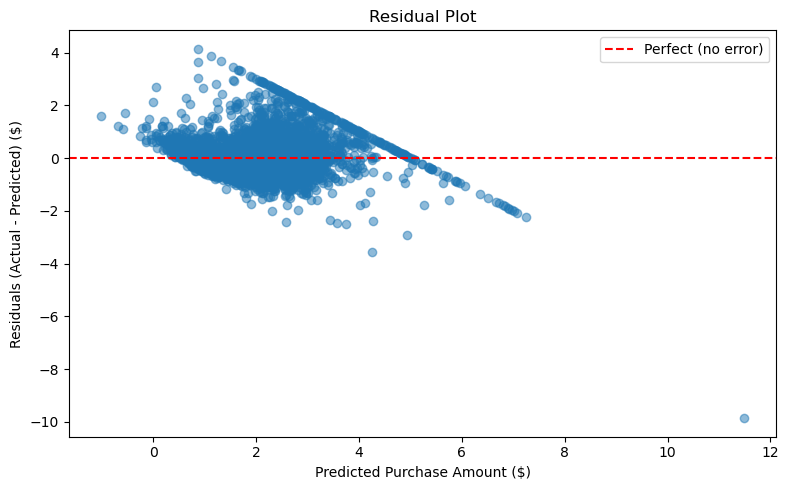

In [17]:
residuals = y_test.values - predictions

# Create plot
plt.figure(figsize=(8,5))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', label='Perfect (no error)')
plt.xlabel('Predicted Purchase Amount ($)')
plt.ylabel('Residuals (Actual - Predicted) ($)')
plt.title('Residual Plot')
plt.legend()
plt.tight_layout()
plt.show()

# Analysis Summary
- Based on the size and quality of the data, the model was able to be properly fitted and trained.
- The visuals confirm that the model is predicting very closely to the actual values

### Deployment Decision
**YES**
This model is acceptable for deployment